In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Load your dataset

filename = 'data_stock_s&p500.csv'
data = pd.read_csv(filename)

In [61]:
print(len(data))
print(data.columns)

417
Index(['ticker', 'market', 'date_pulling', 'industry', 'sector',
       'enterpriseValue', 'totalCashPerShare', 'profitMargins', 'priceToBook',
       'debtToEquity', 'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice'],
      dtype='object')


In [ ]:
data = data.loc[(data['MF_EarningYield'] > 0) & (data['current_MF_ROC'] > 0)]

print(data.describe())

       enterpriseValue  totalCashPerShare  profitMargins  priceToBook  \
count     4.090000e+02         409.000000     409.000000   409.000000   
mean      1.230543e+11          10.118751       0.139905     8.743301   
std       3.384901e+11          43.799166       0.124012    39.137049   
min       6.726991e+09           0.014000      -0.718570  -452.762760   
25%       2.269781e+10           1.714000       0.073060     2.127833   
50%       4.279455e+10           4.425000       0.124460     3.821472   
75%       9.173700e+10          10.185000       0.190560     7.571257   
max       3.587182e+12         856.506000       0.809520   420.112200   

       debtToEquity  returnOnEquity  currentRatio  trailingEps  \
count    409.000000      409.000000    409.000000   409.000000   
mean     168.723237        0.304060      1.650946     7.316846   
std      492.231587        0.628955      1.568569    25.882501   
min        0.502000       -0.389470      0.059000   -65.360000   
25%       41

In [63]:
data['MF_Rank_EY'] = (data['MF_EarningYield'].rank(method='max'))
data['MF_Rank_ROC'] = ((data['avg_MF_ROC'] + data['current_MF_ROC'])/2).rank(method='max')
data['MF_Rank'] = data['MF_Rank_EY'] + data['MF_Rank_ROC']

data = data.set_index('ticker')

In [64]:
data_features = data[
    [
     'MF_Rank',
     'PriceIndex_6m',
    #  'FCF_Yield',
    #  'percenFCFpersharetoprice'
     ]
]
print(data_features.columns)

Index(['MF_Rank', 'PriceIndex_6m'], dtype='object')


In [65]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_features)


# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=data_features.columns)

print(scaled_df.describe())

            MF_Rank  PriceIndex_6m
count  4.090000e+02   4.090000e+02
mean  -1.281235e-16   6.080439e-17
std    1.001225e+00   1.001225e+00
min   -2.130673e+00  -3.143880e+00
25%   -7.486397e-01  -5.788604e-01
50%    1.517759e-01  -6.441758e-02
75%    8.009127e-01   5.346647e-01
max    1.999722e+00   5.006741e+00


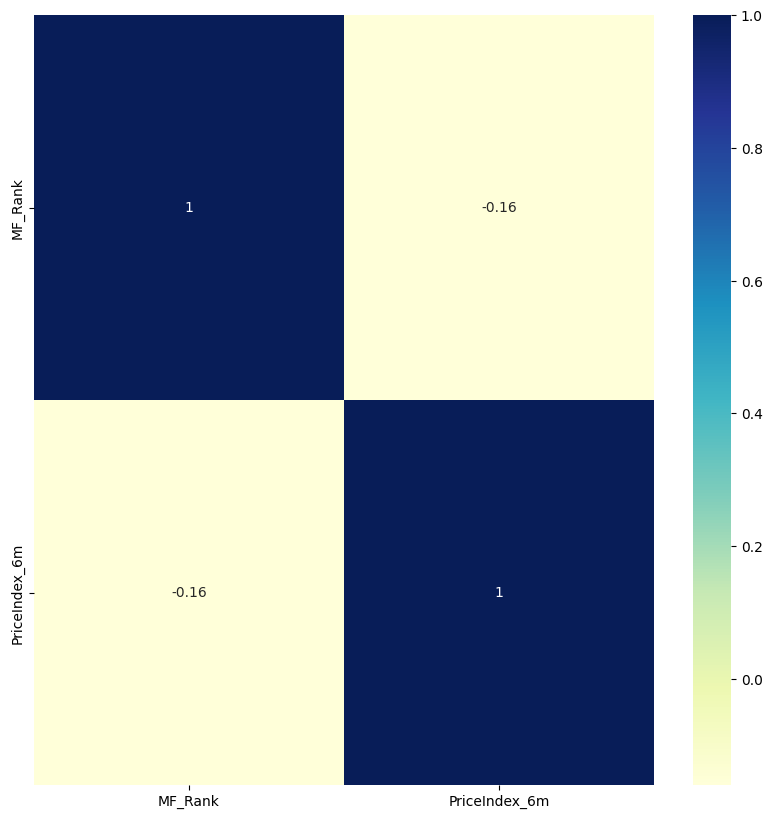

In [66]:
# Plotting correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))

dataplot = sns.heatmap(round(scaled_df.corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

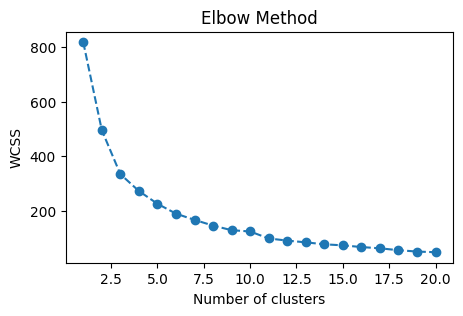

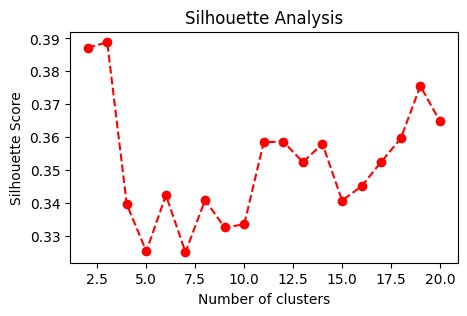

In [67]:
# Generate synthetic data

# Elbow Method
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i,random_state= 1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

# Silhouette Analysis
silhouette_scores = []
for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(5, 3))
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# plt.savefig('silhouette_analysis.png')
plt.show()

Index(['market', 'date_pulling', 'industry', 'sector', 'enterpriseValue',
       'totalCashPerShare', 'profitMargins', 'priceToBook', 'debtToEquity',
       'returnOnEquity', 'currentRatio', 'trailingEps',
       'Total Non Current Assets', 'Working Capital', 'Operating Income',
       'ttm_latest', 'Free Cash Flow', 'avg_MF_ROC', 'beta', 'price_current',
       'price_past', 'MF_EarningYield', 'current_MF_ROC', 'FCF_Yield',
       'PE_offset_Cash', 'PE', 'PriceIndex_6m', 'percenFCFpersharetoprice',
       'MF_Rank_EY', 'MF_Rank_ROC', 'MF_Rank', 'clusterno_kmeans'],
      dtype='object')


/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_20753/3982714637.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


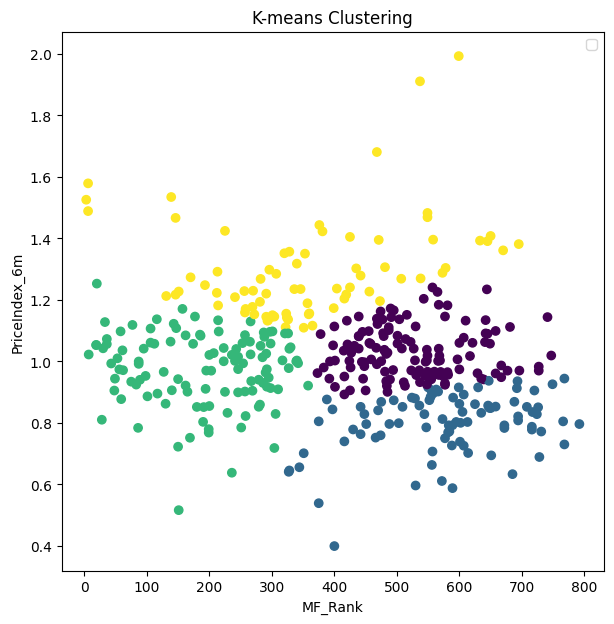

In [74]:
# K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters,random_state = 1)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plotting the clusters
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

print(data.columns)
yax = "PriceIndex_6m"
xax = "MF_Rank"

# K-means plot
ax1.scatter(data[xax], data[yax], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-means Clustering')
ax1.set_xlabel(xax)
ax1.set_ylabel(yax)
ax1.legend(loc='upper right')


plt.show()

In [69]:
data['clusterno_kmeans'] = kmeans_labels
data.to_csv('clustered_'+filename,index= True)

/var/folders/jl/mqglxz2d7gb5ylw3qxtfcr340000gn/T/ipykernel_20753/407723027.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(bpdata,labels=[i for i in range(n_clusters)])


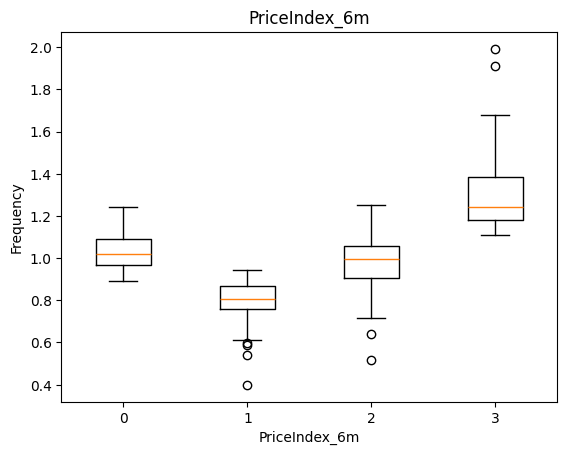

clusterno_kmeans
0    128
1     89
2    116
3     76
Name: count, dtype: int64


In [70]:
#add three histograms to one plot
bpdata = []
for i in range(0,n_clusters,1):
    bpdata.append(data['PriceIndex_6m'].loc[data['clusterno_kmeans'] == i])
    
plt.boxplot(bpdata,labels=[i for i in range(n_clusters)]) 
#add plot title and axis labels
plt.title('PriceIndex_6m')
plt.xlabel('PriceIndex_6m')
plt.ylabel('Frequency')

#display plot
plt.show()
print(data['clusterno_kmeans'].value_counts().sort_index())

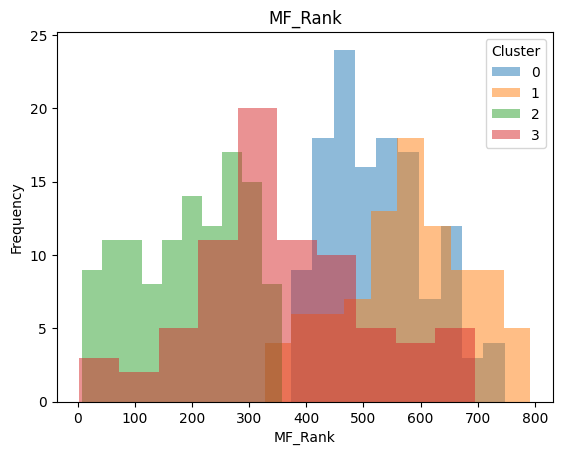

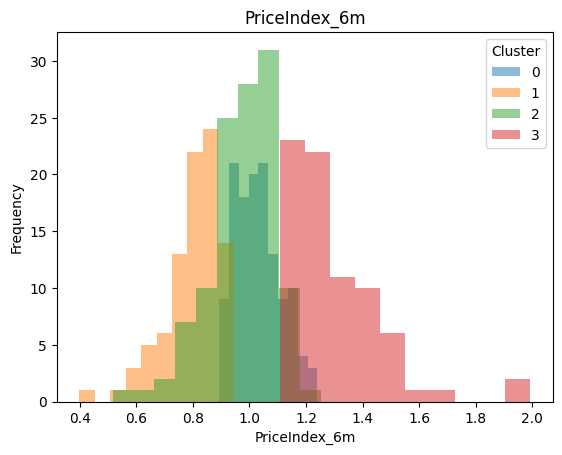

In [71]:
import matplotlib.pyplot as plt

for j in list(data_features.columns) :
    ind = j
    for i in range(0,n_clusters,1):
        #add three histograms to one plot
        plt.hist(data[ind].loc[data['clusterno_kmeans'] == i], alpha=0.5, label=i)


    #add plot title and axis labels
    plt.title(j)
    plt.xlabel(j)
    plt.ylabel('Frequency')

    #add legend
    plt.legend(title='Cluster')
    #display plot
    plt.show()

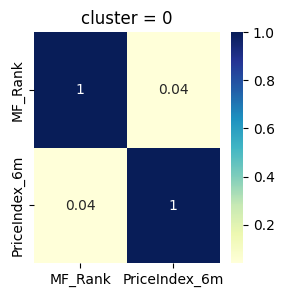

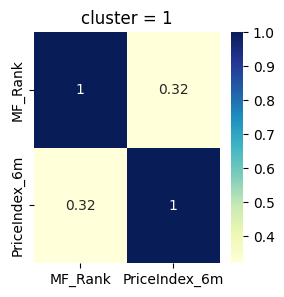

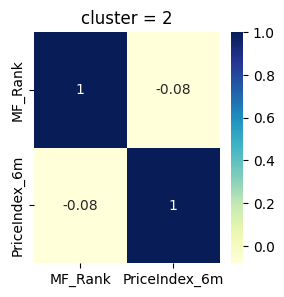

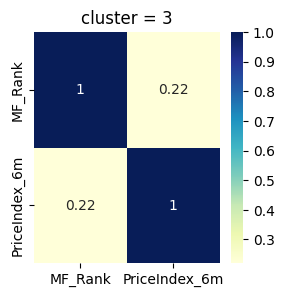

In [72]:
# Plotting correlation heatmap
for i in range(0,n_clusters,1):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_title('cluster = ' + str(i))
    dataplot = sns.heatmap(round(data[data_features.columns].loc[data['clusterno_kmeans'] == i].corr(numeric_only=True),2), cmap="YlGnBu", annot=True,ax = ax )

In [73]:
print(data.loc[data['clusterno_kmeans'] == 3])

        market date_pulling                industry                  sector  \
ticker                                                                        
AMZN    s&p500   2025-03-05         Internet Retail       Consumer Cyclical   
TSLA    s&p500   2025-03-05      Auto Manufacturers       Consumer Cyclical   
WMT     s&p500   2025-03-05         Discount Stores      Consumer Defensive   
V       s&p500   2025-03-05         Credit Services      Financial Services   
COST    s&p500   2025-03-05         Discount Stores      Consumer Defensive   
...        ...          ...                     ...                     ...   
RL      s&p500   2025-03-05   Apparel Manufacturing       Consumer Cyclical   
TPR     s&p500   2025-03-05            Luxury Goods       Consumer Cyclical   
PAYC    s&p500   2025-03-05  Software - Application              Technology   
PARA    s&p500   2025-03-05           Entertainment  Communication Services   
NCLH    s&p500   2025-03-05         Travel Services 